In [18]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns  # seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  # 自相关图
from statsmodels.tsa.stattools import adfuller as ADF  # 平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf  # 偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
from statsmodels.tsa.arima_model import ARIMA
import statsmodels
%matplotlib inline

%pylab inline

#jupyter中文显示是方框，加入下面两行即可显示中文，若嫌麻烦，也可去网上搜索如何永久显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (70, 20)  # 设置输出图片大小
sns.set(color_codes=True)  # seaborn设置背景
gold = pd.read_csv('LBMA-GOLD.csv')
gold.Date=pd.to_datetime(gold.Date)
gold=gold.dropna(axis=0, how='any', inplace=False)
bitcoin = pd.read_csv('BCHAIN-MKPRU.csv')
bitcoin.Date = pd.to_datetime(bitcoin.Date)
gold.to_csv('dataPreprocess_gold.csv')
bitcoin.to_csv('dataPreprocess_bitcoin.csv')




data = pd.merge(bitcoin, gold, on='Date', how='outer')
data[['gold', 'bitcoin']] = data[['gold', 'bitcoin']].astype('float')


Populating the interactive namespace from numpy and matplotlib


D:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


No handles with labels found to put in legend.


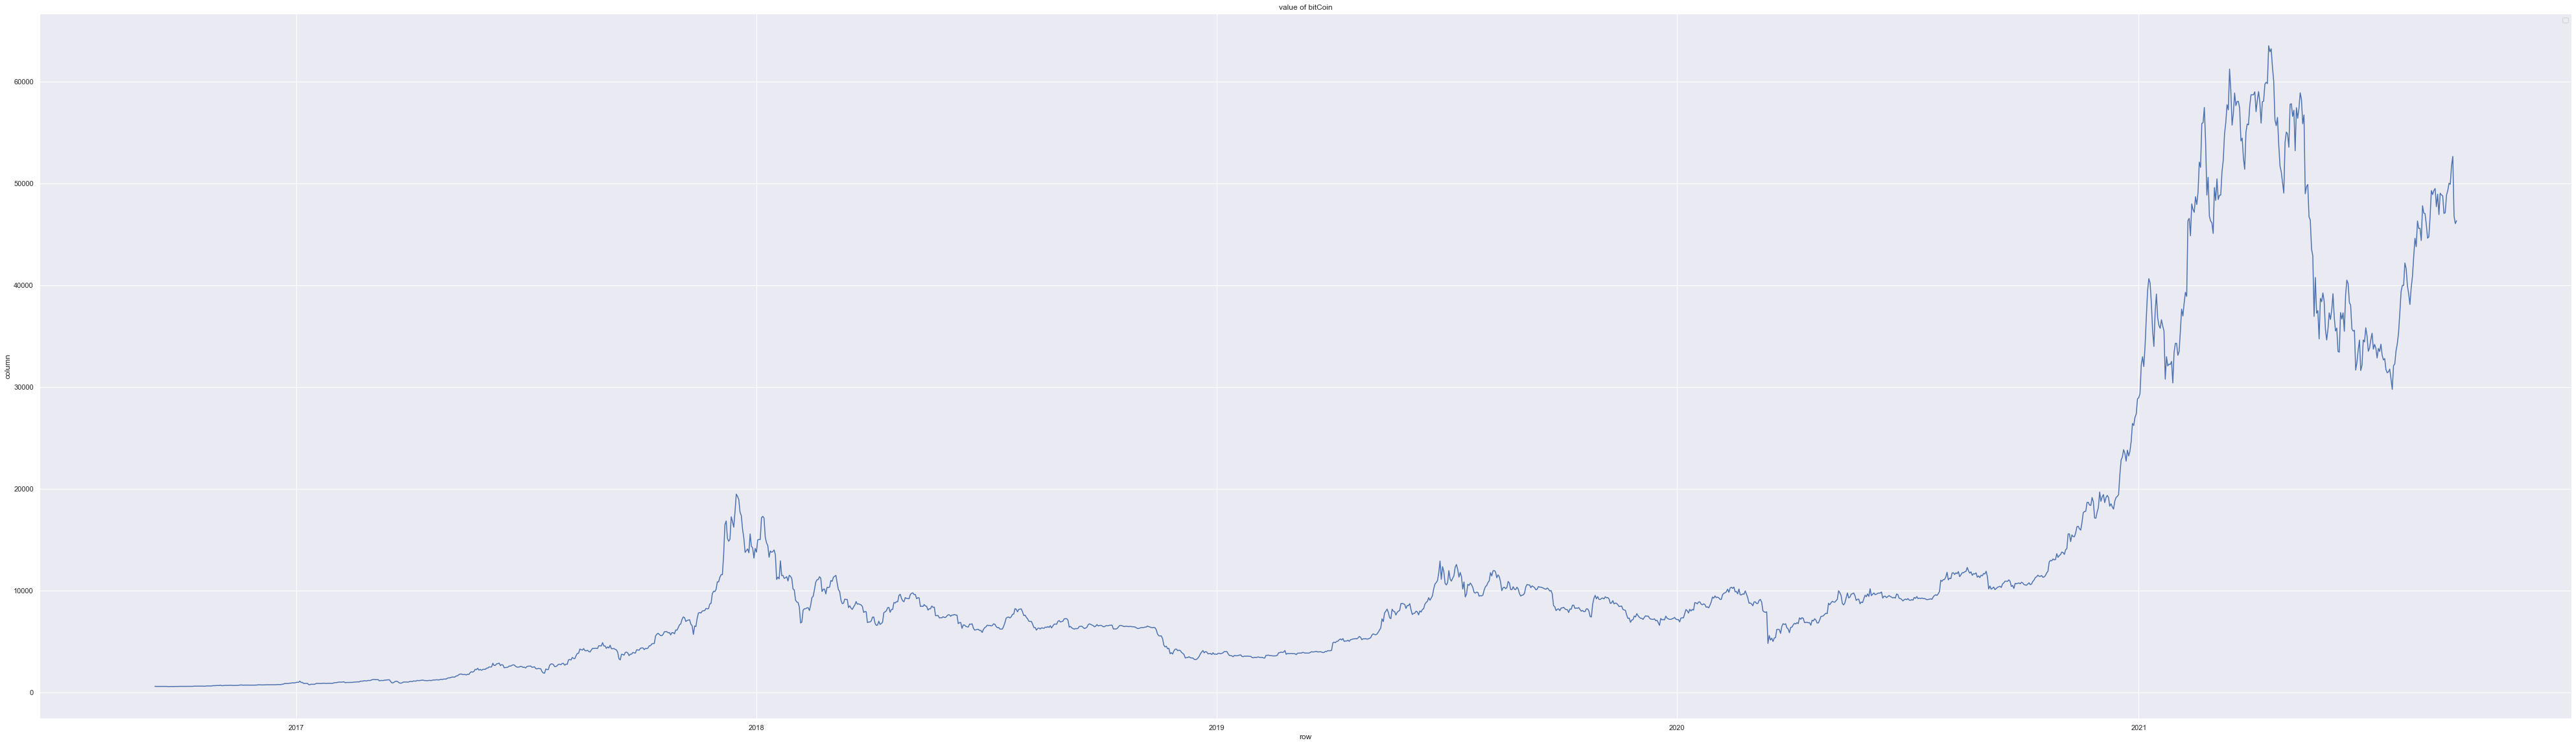

In [3]:

plt.plot(bitcoin.Date,bitcoin.bitcoin)
plt.title('value of bitCoin')
plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show() 


bitcoin原始序列的ADF检验结果为： (-0.23774252687897512, 0.9338707177253291, 24, 1801, {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}, 29168.935944417746)


<ipython-input-14-c400087f0fc6>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax2=plot_acf(bitcoin.diff(1).dropna().bitcoin, title='first order difference ACF of bitcoin').show()


bitcoin一阶差分序列的PADF检验结果为： (-8.535405377369171, 1.0111831893571081e-13, 23, 1801, {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}, 29151.81649615494)


<ipython-input-14-c400087f0fc6>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax3=plot_pacf(bitcoin.diff(1).dropna().bitcoin,


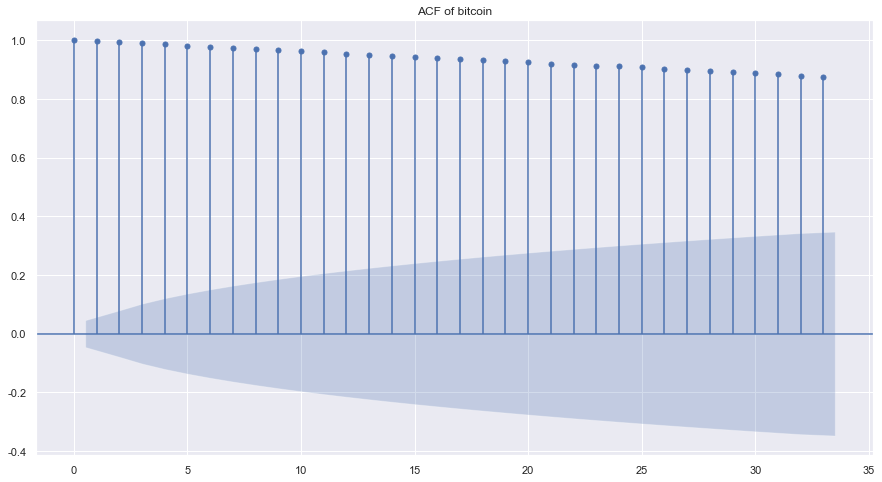

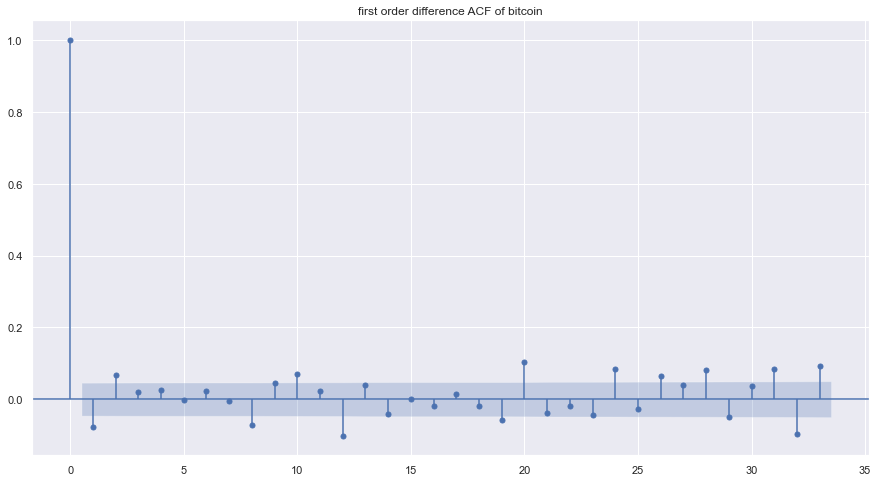

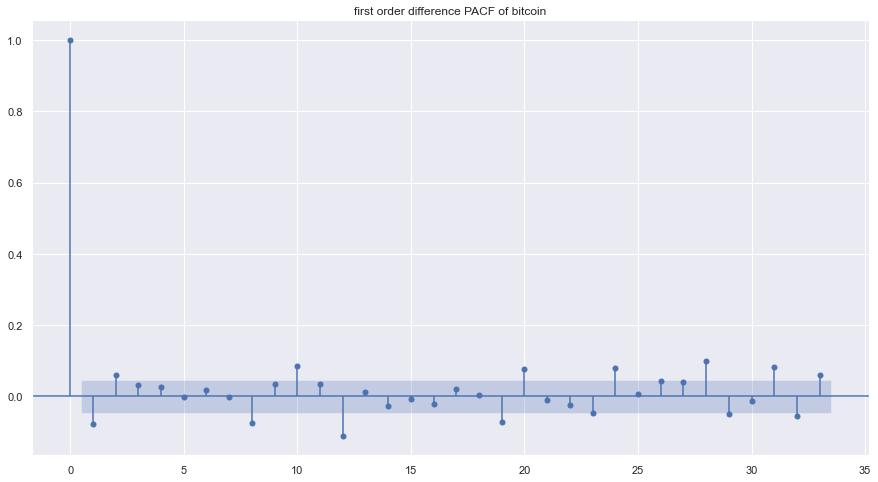

In [14]:
plt.rcParams['figure.figsize'] = (15, 8)  # 设置输出图片大小


ax1=plot_acf(bitcoin.dropna().bitcoin,title='ACF of bitcoin')
print(u'bitcoin原始序列的ADF检验结果为：', ADF(bitcoin[u'bitcoin']))
plt.savefig('./img/ACF_bitcoin_原始.jpg')
ax2=plot_acf(bitcoin.diff(1).dropna().bitcoin, title='first order difference ACF of bitcoin').show()
plt.savefig('./img/ACF_bitcoin_一阶差分.jpg')
print(u'bitcoin一阶差分序列的PADF检验结果为：', ADF(bitcoin.diff(1).dropna()[u'bitcoin']))
ax3=plot_pacf(bitcoin.diff(1).dropna().bitcoin,
          title='first order difference PACF of bitcoin').show()
plt.savefig('./img/PACF_bitcoin_一阶差分.jpg')






In [21]:
bitcoin_diff=bitcoin.diff(1).dropna()
bitcoin_diff.Date=bitcoin.Date
bitcoin_diff=bitcoin_diff.set_index('Date')

train_results = statsmodels.tsa.stattools.arma_order_select_ic(
    bitcoin_diff, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)


D:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in fa

In [22]:
train_results


{'aic':               0             1             2             3             4
 0           NaN  29608.092132  29601.141814  29601.958529  29602.521775
 1  29606.852832  29604.748063  29600.831945  29602.798452  29604.449897
 2  29601.762814  29600.803528  29552.410564  29604.601383  29606.328984
 3  29601.852297  29602.786814  29604.775782  29589.265811  29591.116188
 4  29602.479442  29604.429195  29606.387298  29592.304784  29561.315849,
 'bic':               0             1             2             3             4
 0           NaN  29619.110802  29617.669820  29623.995870  29630.068451
 1  29617.871502  29621.276069  29622.869286  29630.345128  29637.505909
 2  29618.290820  29622.840869  29579.957240  29637.657395  29644.894331
 3  29623.889638  29630.333490  29637.831794  29627.831158  29635.190870
 4  29630.026118  29637.485207  29644.952645  29636.379466  29610.899866,
 'aic_min_order': (2, 2),
 'bic_min_order': (2, 2)}

In [11]:
time=[]
p=[]
war=[]
train=bitcoin.set_index('Date')
for i in range(20, 1827):
    try :
        model = ARIMA(train[0:i], order=(1, 1, 1)).fit() 
        predictions_f_ms = model.predict(i,i+1,dynamic=True, typ='levels')
    except:
        war.append(i)
        continue
    p.append(predictions_f_ms[0])
    time.append(predictions_f_ms.index[0])

D:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmo

In [13]:
war

[10, 11, 12, 13, 14, 15, 17, 420, 421]

ValueError: x and y must have same first dimension, but have shapes (1,) and (1630,)

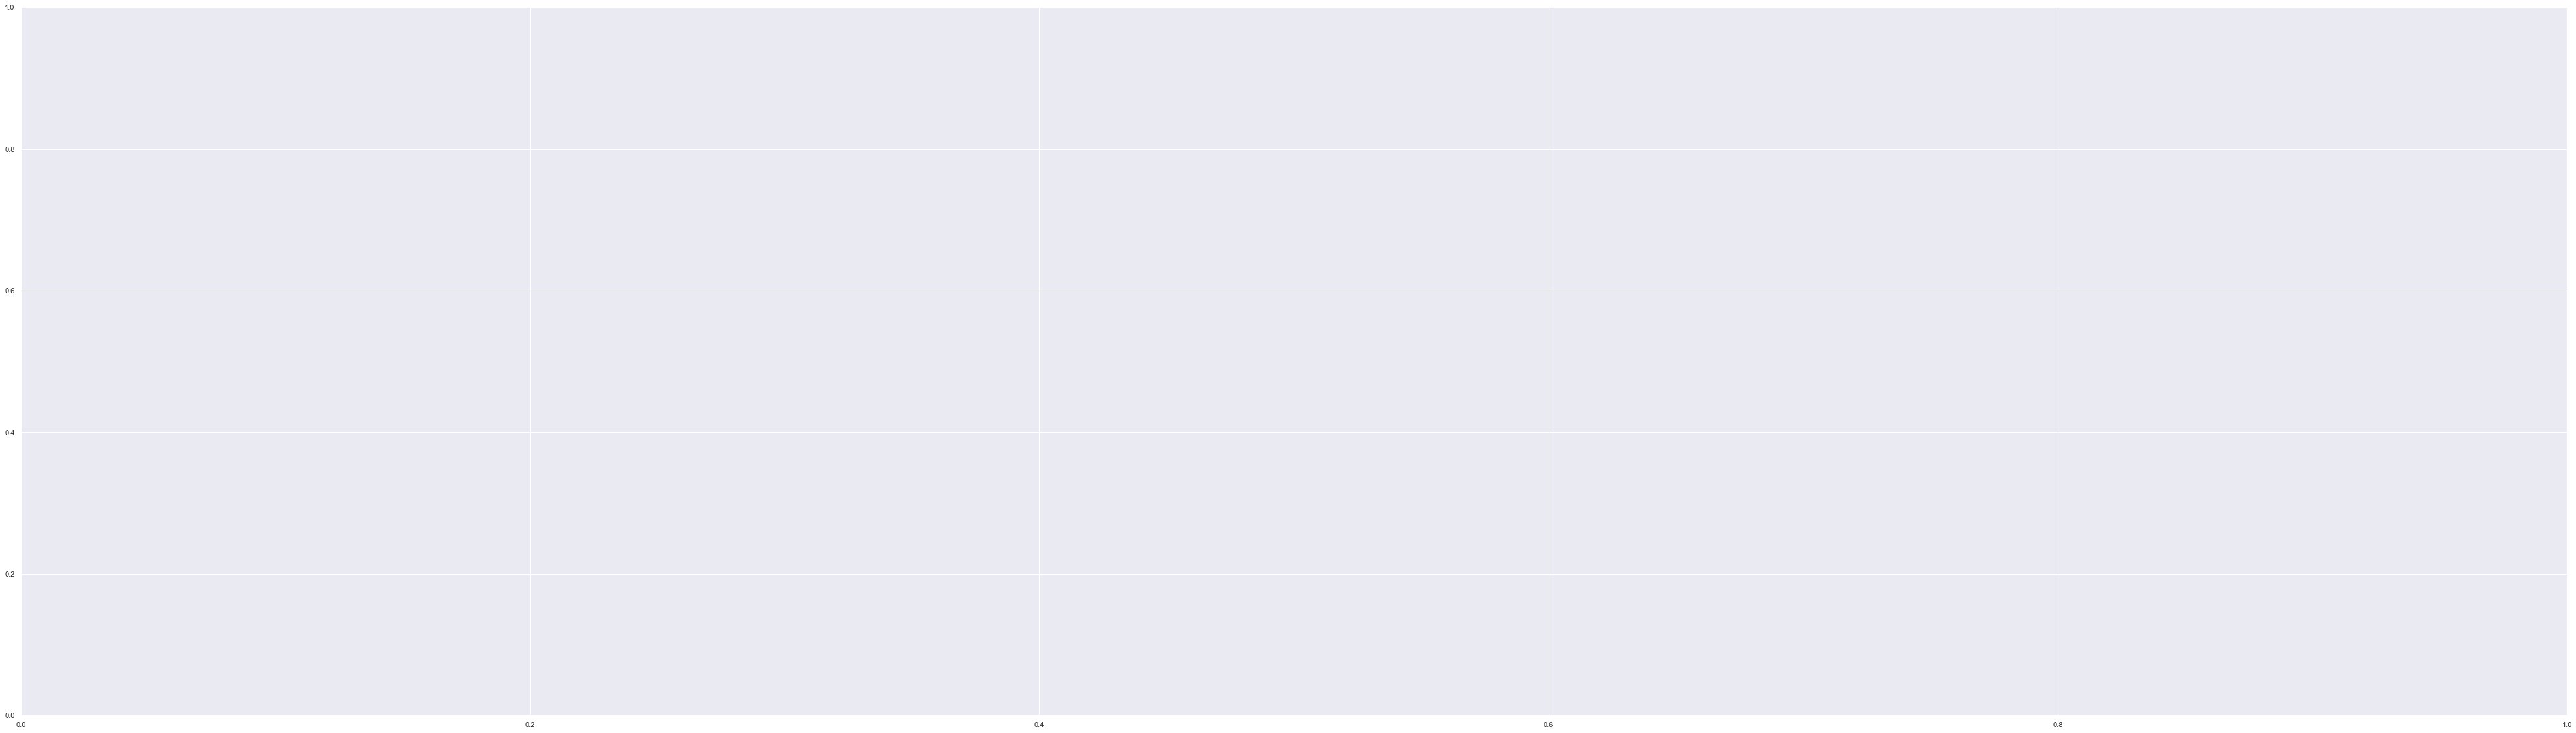

In [217]:
plt.plot(time, p, 'r-','original data of bitcoin', bitcoin.Date, bitcoin.bitcoin, 'g-',)
plt.title('value of bitCoin')
re= pd.DataFrame()
re['Date']=time
re['Value']=p
re.to_csv("bitcoin.csv")


In [212]:
a=[1,2,3,4]
print(a[0:1])

[1]
